# Analyse Exploratoire

### Import des modules

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib

### Analyse Exploratoire

In [44]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [45]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [46]:
building_consumption["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [47]:
building_consumption = building_consumption[building_consumption['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA'])]

In [48]:
building_consumption.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [49]:
len(building_consumption.columns)

46

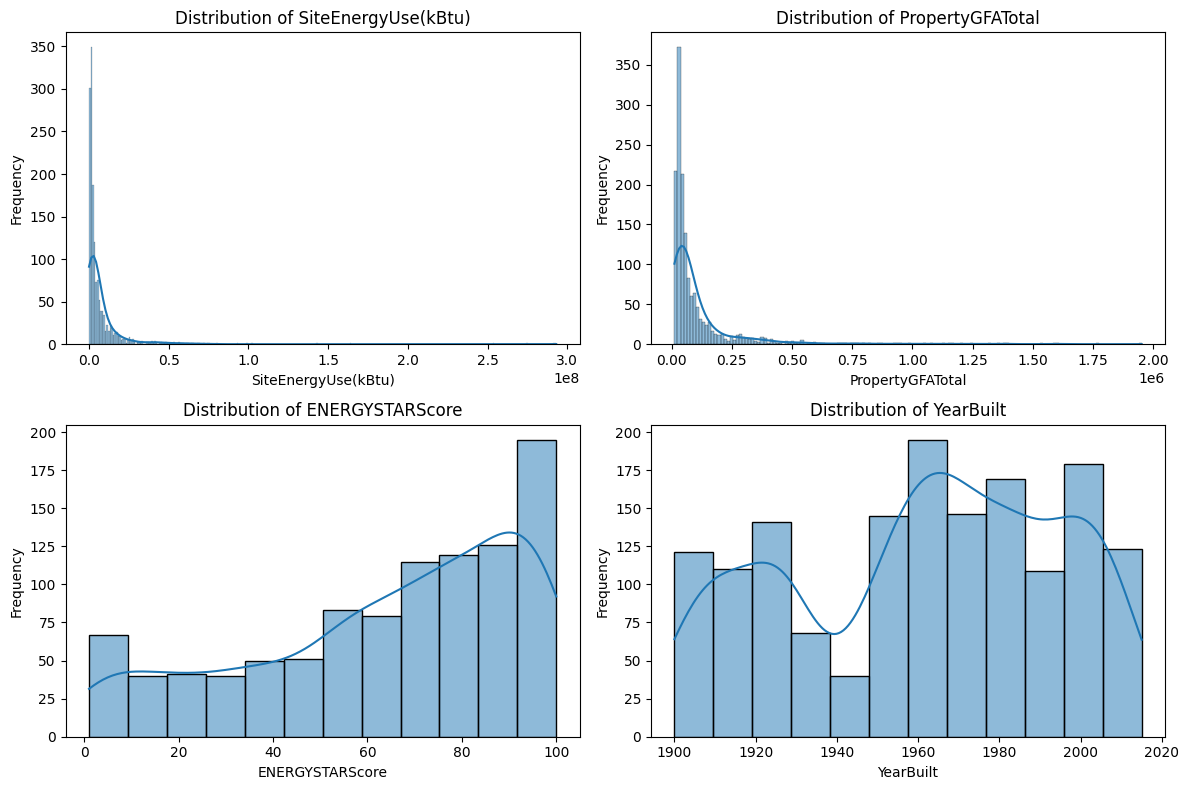

In [50]:
# Creating the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes for easy indexing
axes = axes.flatten()
cols = ["SiteEnergyUse(kBtu)",
        "PropertyGFATotal",
        "ENERGYSTARScore",
        "YearBuilt"]
# Plot each column
for i, col in enumerate(cols):
    sns.histplot(building_consumption[col], kde=True, ax=axes[i])  # Add kde=True for a density curve
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
# Define the list of columns you want to keep
keepColumns = [
    "SiteEnergyUse(kBtu)",
    "TotalGHGEmissions",
    "BuildingType",
    # "ZipCode",
    "CouncilDistrictCode",
    # "Neighborhood",
    "YearBuilt",
    "NumberofFloors",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseType",
    "LargestPropertyUseTypeGFA",
    # "SecondLargestPropertyUseType",
    # "SecondLargestPropertyUseTypeGFA",
    # "ThirdLargestPropertyUseType",
    # "ThirdLargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)',

]

# Filter the DataFrame to keep only the columns in keepColumns
building_consumption_filtered = building_consumption[keepColumns]

# Show the first few rows of the filtered DataFrame to verify
building_consumption_filtered.head()


,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingType,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,7226362.5,249.98,NonResidential,7,1927,12,88434,0,88434,Hotel,88434.0,60.0,2003882.00,3946027.0,1276453.0
1,8387933.0,295.86,NonResidential,7,1996,11,103566,15064,88502,Hotel,83880.0,61.0,0.00,3242851.0,5145082.0
2,72587024.0,2089.28,NonResidential,7,1969,41,956110,196718,759392,Hotel,756493.0,43.0,21566554.00,49526664.0,1493800.0
3,6794584.0,286.43,NonResidential,7,1926,10,61320,0,61320,Hotel,61320.0,56.0,2214446.25,2768924.0,1811213.0
4,14172606.0,505.01,NonResidential,7,1980,18,175580,62000,113580,Hotel,123445.0,75.0,0.00,5368607.0,8803998.0


In [52]:
building_consumption_filtered.shape

(1546, 15)

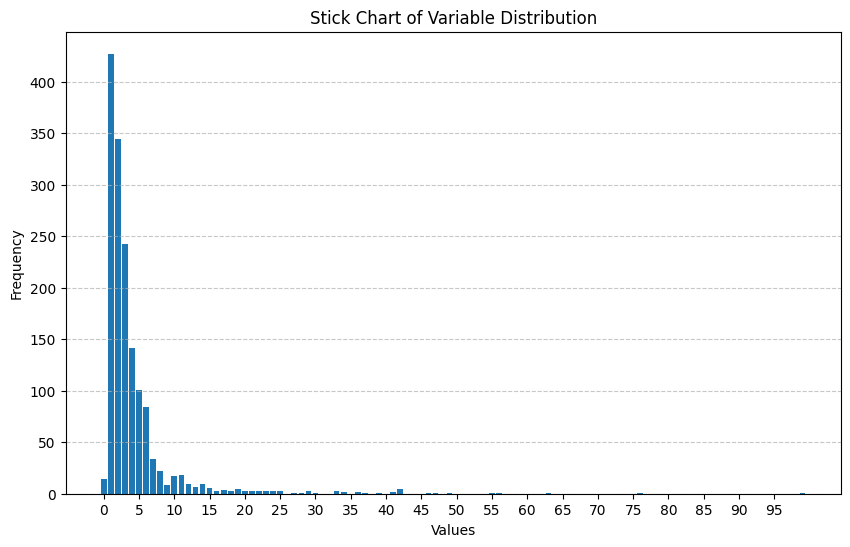

In [53]:
# Replace 'column_name' with your specific column name
frequency = building_consumption_filtered['NumberofFloors'].value_counts().reset_index()
frequency.columns = ['Value', 'Count']
plt.figure(figsize=(10, 6))
plt.bar(frequency['Value'], frequency['Count'], align='center')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Stick Chart of Variable Distribution')
plt.xticks(range(0, frequency['Value'].max() + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*On va garder uniquement les valeurs entre 1 et 11*

In [54]:
building_consumption_filtered = building_consumption_filtered[(building_consumption_filtered['NumberofFloors'] >= 1) & (building_consumption_filtered['NumberofFloors'] <= 11)]

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation 

### Import des modules 

In [55]:
#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [56]:
building_consumption_filtered

,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingType,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
1,8.387933e+06,295.86,NonResidential,7,1996,11,103566,15064,88502,Hotel,83880.0,61.0,0.00,3.242851e+06,5.145082e+06
3,6.794584e+06,286.43,NonResidential,7,1926,10,61320,0,61320,Hotel,61320.0,56.0,2214446.25,2.768924e+06,1.811213e+06
5,1.208662e+07,301.81,Nonresidential COS,7,1999,2,97288,37198,60090,Police Station,88830.0,NaN,0.00,7.371434e+06,4.715182e+06
6,5.758795e+06,176.14,NonResidential,7,1926,11,83008,0,83008,Hotel,81352.0,27.0,0.00,2.811215e+06,2.947580e+06
7,6.298132e+06,221.51,NonResidential,7,1926,8,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,NaN,2276286.50,3.636655e+06,3.851890e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,8.497457e+05,20.94,Nonresidential COS,2,1990,1,12294,0,12294,Office,12294.0,46.0,0.00,5.242709e+05,3.254750e+05
3372,9.502762e+05,32.17,Nonresidential COS,2,2004,1,16000,0,16000,Other - Recreation,16000.0,NaN,0.00,3.965461e+05,5.537300e+05
3373,5.765898e+06,223.54,Nonresidential COS,7,1974,1,13157,0,13157,Other - Recreation,7583.0,NaN,0.00,1.792159e+06,3.973739e+06
3374,7.194712e+05,22.11,Nonresidential COS,1,1989,1,14101,0,14101,Other - Recreation,6601.0,NaN,0.00,3.488702e+05,3.706010e+05


In [57]:
numeric_columns = list(building_consumption_filtered.select_dtypes(include=['number']).columns)
numeric_columns

['SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)']

In [58]:
building_consumption_filtered = building_consumption_filtered.dropna(subset=numeric_columns) # on retire les deux lignes avec des valeurs nulles génantes

In [59]:
from scipy.stats import zscore

# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=2):
    print(len(df))
    df_filtered = df[(np.abs(zscore(df[columns])) < threshold).all(axis=1)]
    print(len(df_filtered))
    return df_filtered

# Apply the function
building_consumption_filtered = remove_outliers_zscore(building_consumption_filtered, numeric_columns)

# Display cleaned DataFrame
print(building_consumption_filtered)

906
756
      SiteEnergyUse(kBtu)  TotalGHGEmissions        BuildingType  \
23           3.663534e+06              90.01      NonResidential   
29           4.456714e+06             128.44      NonResidential   
33           6.668568e+06             215.00      NonResidential   
39           6.186462e+06             130.56      NonResidential   
40           2.951331e+06              83.86      NonResidential   
...                   ...                ...                 ...   
3339         4.420650e+06             134.80      NonResidential   
3347         1.325973e+06               9.24      NonResidential   
3366         5.026677e+05               3.50  Nonresidential COS   
3369         3.878100e+05               7.79  Nonresidential COS   
3371         8.497457e+05              20.94  Nonresidential COS   

      CouncilDistrictCode  YearBuilt  NumberofFloors  PropertyGFATotal  \
23                      4       2001               6             88592   
29                      7  

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [60]:
building_consumption_filtered["Age"] = 2016 - building_consumption_filtered["YearBuilt"]
building_consumption_filtered = building_consumption_filtered.drop("YearBuilt", axis=1)

In [61]:
building_consumption_filtered.isna().sum()

SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
BuildingType                 0
CouncilDistrictCode          0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
ENERGYSTARScore              0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
Age                          0
dtype: int64

In [62]:
building_consumption_filtered.dtypes

SiteEnergyUse(kBtu)          float64
TotalGHGEmissions            float64
BuildingType                  object
CouncilDistrictCode            int64
NumberofFloors                 int64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SteamUse(kBtu)               float64
Electricity(kBtu)            float64
NaturalGas(kBtu)             float64
Age                            int64
dtype: object

In [63]:
building_consumption_filtered = building_consumption_filtered.dropna(subset=['SiteEnergyUse(kBtu)'])
building_consumption_filtered = building_consumption_filtered.dropna(subset=['TotalGHGEmissions'])
building_consumption_filtered = building_consumption_filtered.dropna(subset=['LargestPropertyUseType'])

In [64]:
# building_consumption_filtered['SecondLargestPropertyUseType'] = building_consumption_filtered['SecondLargestPropertyUseType'].fillna(
#     building_consumption_filtered['LargestPropertyUseType']
# )
# building_consumption_filtered['SecondLargestPropertyUseTypeGFA'] = building_consumption_filtered['SecondLargestPropertyUseTypeGFA'].fillna(
#     0
# )

# building_consumption_filtered['ThirdLargestPropertyUseType'] = building_consumption_filtered['ThirdLargestPropertyUseType'].fillna(
#     building_consumption_filtered['LargestPropertyUseType']
# )
# building_consumption_filtered['ThirdLargestPropertyUseTypeGFA'] = building_consumption_filtered['ThirdLargestPropertyUseTypeGFA'].fillna(
#     0
# )

In [65]:
meanENERGYSTARScore = building_consumption_filtered['ENERGYSTARScore'].mean()
building_consumption_filtered['ENERGYSTARScore'] = building_consumption_filtered['ENERGYSTARScore'].fillna(meanENERGYSTARScore)

In [66]:
# building_consumption_filtered['ZipCode'] = building_consumption_filtered['ZipCode'].fillna("98100.0")

In [67]:
building_consumption_filtered.dtypes

SiteEnergyUse(kBtu)          float64
TotalGHGEmissions            float64
BuildingType                  object
CouncilDistrictCode            int64
NumberofFloors                 int64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
LargestPropertyUseType        object
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SteamUse(kBtu)               float64
Electricity(kBtu)            float64
NaturalGas(kBtu)             float64
Age                            int64
dtype: object

In [68]:
building_consumption_filtered['PropertyGFAParking'] = (building_consumption_filtered['PropertyGFAParking'] != 0).astype(int)

building_consumption_filtered['SteamUse(kBtu)'] = (building_consumption_filtered['SteamUse(kBtu)'] != 0).astype(int)
building_consumption_filtered['Electricity(kBtu)'] = (building_consumption_filtered['Electricity(kBtu)'] != 0).astype(int)
building_consumption_filtered['NaturalGas(kBtu)'] = (building_consumption_filtered['NaturalGas(kBtu)'] != 0).astype(int)

In [69]:
building_consumption_filtered['CouncilDistrictCode'] = building_consumption_filtered['CouncilDistrictCode'].astype(str)

In [70]:
building_consumption_filtered['PropertyAreaTimesFloorWithParking'] = (building_consumption_filtered['PropertyGFATotal']*building_consumption_filtered['NumberofFloors']).astype(int)
building_consumption_filtered['LargestPropertyUseTypeAreaTimesFloor'] = (building_consumption_filtered['LargestPropertyUseTypeGFA']*building_consumption_filtered['NumberofFloors']).astype(int)
# building_consumption_filtered['PropertyAreaPerFloor'] = (building_consumption_filtered['PropertyGFABuilding(s)']*building_consumption_filtered['NumberofFloors']).astype(int)

# Surface par floor
building_consumption_filtered = building_consumption_filtered.drop("NumberofFloors", axis=1)
building_consumption_filtered = building_consumption_filtered.drop("PropertyGFATotal", axis=1)
building_consumption_filtered = building_consumption_filtered.drop("LargestPropertyUseTypeGFA", axis=1)
#building_consumption_filtered = building_consumption_filtered.drop("PropertyGFABuilding(s)", axis=1)

In [71]:
building_consumption_filtered.dtypes

SiteEnergyUse(kBtu)                     float64
TotalGHGEmissions                       float64
BuildingType                             object
CouncilDistrictCode                      object
PropertyGFAParking                        int64
PropertyGFABuilding(s)                    int64
LargestPropertyUseType                   object
ENERGYSTARScore                         float64
SteamUse(kBtu)                            int64
Electricity(kBtu)                         int64
NaturalGas(kBtu)                          int64
Age                                       int64
PropertyAreaTimesFloorWithParking         int64
LargestPropertyUseTypeAreaTimesFloor      int64
dtype: object

In [72]:
for i in(building_consumption_filtered.columns):
    print(i)

SiteEnergyUse(kBtu)
TotalGHGEmissions
BuildingType
CouncilDistrictCode
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseType
ENERGYSTARScore
SteamUse(kBtu)
Electricity(kBtu)
NaturalGas(kBtu)
Age
PropertyAreaTimesFloorWithParking
LargestPropertyUseTypeAreaTimesFloor


In [73]:
building_consumption_filtered.rename(columns={"SteamUse(kBtu)" : "SteamUse",
                                              "Electricity(kBtu)" : "ElectricityUse",
                                              "NaturalGas(kBtu)" : "NaturalGasUse",
                                              "PropertyGFABuilding(s)": "PropertyGFABuilding",
                                              "PropertyGFAParking": "PropertyParking"},
                      inplace=True)

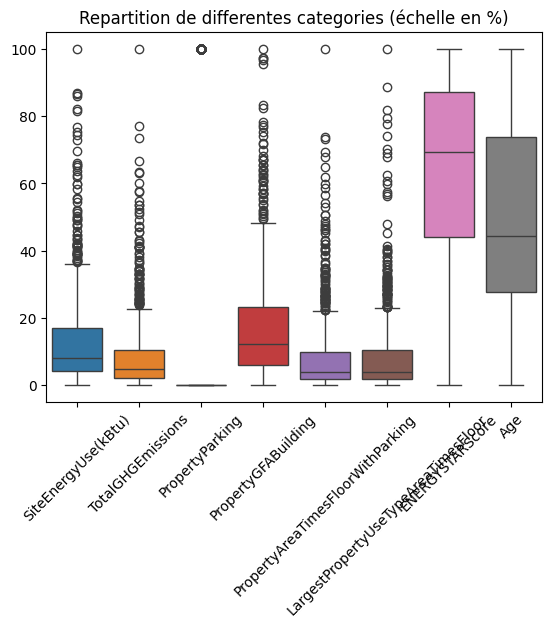

In [74]:
import seaborn as sns
# Assuming `df` is your DataFrame
selected_features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyParking',
                     "PropertyGFABuilding",  'PropertyAreaTimesFloorWithParking', 'LargestPropertyUseTypeAreaTimesFloor', 'ENERGYSTARScore',
                     'Age']  # Replace with actual numeric variables

# Assuming the range is 0-100 for relative percentages
df_relative = building_consumption_filtered.copy()[selected_features]
df_relative = (df_relative - df_relative.min()) / (df_relative.max() - df_relative.min()) * 100

# Plot the boxplot with relative percentages
sns.boxplot(data=df_relative)
plt.title('Repartition de differentes categories (échelle en %)')
plt.xticks(rotation=45)
plt.show()



In [75]:
building_consumption["CouncilDistrictCode"].unique()

array([7, 3, 4, 2, 6, 1, 5])

In [76]:
categorical_columns = ['BuildingType', 'CouncilDistrictCode', 'LargestPropertyUseType']

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' encode une colonne de moins qui peut de toute manière être deduite des autres colonnes

encoded_data = encoder.fit_transform(building_consumption_filtered[categorical_columns])

encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(categorical_columns),
    index=building_consumption_filtered.index  # Preserve the original index
).astype(int)

building_consumption_encoded = pd.concat(
    [building_consumption_filtered.drop(columns=categorical_columns), encoded_df],
    axis=1
)

joblib.dump(encoder, 'encoder/one_hot_encoder.pkl')  # Save the encoder

#building_consumption_filtered.drop(categorical_columns, axis=1, inplace=True)

building_consumption_encoded.head()


,SiteEnergyUse(kBtu),TotalGHGEmissions,PropertyParking,PropertyGFABuilding,ENERGYSTARScore,SteamUse,ElectricityUse,NaturalGasUse,Age,PropertyAreaTimesFloorWithParking,...,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
23,3663534.50,90.01,1,58006,84.0,0,1,1,15,531552,...,0,0,0,0,0,0,0,0,0,0
29,4456714.50,128.44,1,52210,57.0,0,1,1,38,342050,...,0,0,0,0,0,0,0,0,0,0
33,6668568.50,215.00,0,81871,29.0,0,1,1,22,327484,...,0,0,0,0,0,0,0,0,0,0
39,6186461.50,130.56,0,94900,57.0,0,1,1,55,189800,...,1,0,0,0,0,0,0,0,0,0
40,2951331.25,83.86,0,52554,83.0,0,1,1,116,105108,...,1,0,0,0,0,0,0,0,0,0


In [77]:
building_consumption_encoded.columns

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyParking',
       'PropertyGFABuilding', 'ENERGYSTARScore', 'SteamUse', 'ElectricityUse',
       'NaturalGasUse', 'Age', 'PropertyAreaTimesFloorWithParking',
       'LargestPropertyUseTypeAreaTimesFloor',
       'BuildingType_Nonresidential COS', 'CouncilDistrictCode_2',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
       'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
       'CouncilDistrictCode_7', 'LargestPropertyUseType_Distribution Center',
       'LargestPropertyUseType_Financial Office',
       'LargestPropertyUseType_Hospital (General Medical & Surgical)',
       'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_K-12 School',
       'LargestPropertyUseType_Medical Office',
       'LargestPropertyUseType_Multifamily Housing',
       'LargestPropertyUseType_Non-Refrigerated Warehouse',
       'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other',
       'LargestPropertyUseType_Parking',
     

In [78]:
# Separate target columns
target_columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
building_consumption_encoded = building_consumption_encoded.drop(columns="LargestPropertyUseTypeAreaTimesFloor") #this column is later identified as redundant, the scaler should not fit with it

# Identify numerical columns (excluding target columns and boolean columns)
numerical_columns = building_consumption_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in target_columns]

# Exclude boolean columns from scaling (assuming they are of type int64 and are binary)
boolean_columns = building_consumption_encoded.select_dtypes(include=['int64']).columns
boolean_columns = [col for col in boolean_columns if building_consumption_encoded[col].nunique() == 2]

# Final columns to scale (excluding target and boolean columns)
columns_to_scale = [col for col in numerical_columns if col not in boolean_columns]

# Apply StandardScaler to numerical columns, excluding boolean columns and targets
scaler = StandardScaler()
df_scaled = building_consumption_encoded.copy()

# Fit and transform the scaler only on the selected numerical columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

joblib.dump(scaler, 'encoder/std_scaler.pkl')  # Save the encoder

df_scaled


,SiteEnergyUse(kBtu),TotalGHGEmissions,PropertyParking,PropertyGFABuilding,ENERGYSTARScore,SteamUse,ElectricityUse,NaturalGasUse,Age,PropertyAreaTimesFloorWithParking,...,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
23,3.663534e+06,90.01,1,0.095332,0.711037,0,1,1,-1.313999,1.436302,...,0,0,0,0,0,0,0,0,0,0
29,4.456714e+06,128.44,1,-0.052687,-0.297208,0,1,1,-0.587333,0.651335,...,0,0,0,0,0,0,0,0,0,0
33,6.668568e+06,215.00,0,0.704800,-1.342795,0,1,1,-1.092840,0.590999,...,0,0,0,0,0,0,0,0,0,0
39,6.186462e+06,130.56,0,1.037537,-0.297208,0,1,1,-0.050233,0.020675,...,1,0,0,0,0,0,0,0,0,0
40,2.951331e+06,83.86,0,-0.043902,0.673694,0,1,1,1.877010,-0.330142,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,4.420650e+06,134.80,0,-0.747837,-2.089642,0,1,1,0.960780,-0.558497,...,1,0,0,0,0,0,0,0,0,0
3347,1.325973e+06,9.24,0,-0.236818,0.449640,0,1,0,-1.756317,-0.206321,...,0,0,0,0,0,0,0,0,0,0
3366,5.026677e+05,3.50,0,-1.037159,0.374955,0,1,0,0.234114,-0.708940,...,1,0,0,0,0,0,0,0,0,0
3369,3.878100e+05,7.79,0,-0.992799,1.047118,0,1,1,-0.018639,-0.701745,...,1,0,0,0,0,0,0,0,0,0


In [79]:
df_scaled.columns

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyParking',
       'PropertyGFABuilding', 'ENERGYSTARScore', 'SteamUse', 'ElectricityUse',
       'NaturalGasUse', 'Age', 'PropertyAreaTimesFloorWithParking',
       'BuildingType_Nonresidential COS', 'CouncilDistrictCode_2',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
       'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
       'CouncilDistrictCode_7', 'LargestPropertyUseType_Distribution Center',
       'LargestPropertyUseType_Financial Office',
       'LargestPropertyUseType_Hospital (General Medical & Surgical)',
       'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_K-12 School',
       'LargestPropertyUseType_Medical Office',
       'LargestPropertyUseType_Multifamily Housing',
       'LargestPropertyUseType_Non-Refrigerated Warehouse',
       'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other',
       'LargestPropertyUseType_Parking',
       'LargestPropertyUseType_Refrigerated Warehous

In [80]:
columns_to_scale

['PropertyGFABuilding',
 'ENERGYSTARScore',
 'Age',
 'PropertyAreaTimesFloorWithParking']

In [81]:
# Assuming you have your DataFrame ready after correlation checks and removals
# Save the cleaned DataFrame to a CSV file
df_scaled.to_csv('MLData.csv', index=False)

# The 'index=False' argument prevents Pandas from writing row indices to the CSV file.
print("CSV file has been saved successfully.")


CSV file has been saved successfully.
